In [3]:
!pip install torch
!pip install torchvision

  Using cached sympy-1.14.0-py3-none-any.whl.metadata (12 kB)
  Using cached networkx-3.5-py3-none-any.whl.metadata (6.3 kB)
  Using cached fsspec-2025.5.1-py3-none-any.whl.metadata (11 kB)
  Using cached setuptools-80.9.0-py3-none-any.whl.metadata (6.6 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
   ---------------------------------------- 0.0/216.1 MB ? eta -:--:--
   ---------------------------------------- 0.3/216.1 MB ? eta -:--:--
   ---------------------------------------- 0.8/216.1 MB 3.3 MB/s eta 0:01:05
   ---------------------------------------- 1.3/216.1 MB 2.6 MB/s eta 0:01:24
   ---------------------------------------- 1.8/216.1 MB 2.3 MB/s eta 0:01:34
   ---------------------------------------- 2.6/216.1 MB 2.7 MB/s eta 0:01:18
    --------------------------------------- 3.4/216.1 MB 3.0 MB/s eta 0:01:11
    --------------------------------------- 4.5/216.1 MB 3.3 MB/s eta 0:01:05
   - -------------------------------------- 5.5/216.1 MB 3.5 MB/s eta


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached pillow-11.2.1-cp312-cp312-win_amd64.whl.metadata (9.1 kB)
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.7 MB ? eta -:--:--
   ------------------ --------------------- 0.8/1.7 MB 1.8 MB/s eta 0:00:01
   ------------------ --------------------- 0.8/1.7 MB 1.8 MB/s eta 0:00:01
   ------------------ --------------------- 0.8/1.7 MB 1.8 MB/s eta 0:00:01
   ------------------------ --------------- 1.0/1.7 MB 931.8 kB/s eta 0:00:01
   ------------------------ --------------- 1.0/1.7 MB 931.8 kB/s eta 0:00:01
   ---------------------------------------- 1.7/1.7 MB 1.1 MB/s eta 0:00:00
Using cached pillow-11.2.1-cp312-cp312-win_amd64.whl (2.7 MB)
   ---------------------------------------- 0.0/12.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.7 MB ? 


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
!pip install scikit-learn

  Using cached scipy-1.15.3-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
    --------------------------------------- 0.3/10.7 MB ? eta -:--:--
   --- ------------------------------------ 1.0/10.7 MB 5.0 MB/s eta 0:00:02
   --- ------------------------------------ 1.0/10.7 MB 5.0 MB/s eta 0:00:02
   ---- ----------------------------------- 1.3/10.7 MB 2.4 MB/s eta 0:00:04
   ------ --------------------------------- 1.8/10.7 MB 1.9 MB/s eta 0:00:05
   ------ --------------------------------- 1.8/10.7 MB 1.9 MB/s eta 0:00:05
   ------- -------------------------------- 2.1/10.7 MB 1.7 MB/s eta 0:00:06
   --------- ------------------------------ 2.6/10.7 MB 1.6 MB/s eta 0:00:06
   ------------ --------------------------- 3.4/10.7 MB 1.9 MB/s eta 0:00:04
   ---------------- ----------------------- 4.5/10.7 MB 2.2 MB/s eta 0:00:03
   -------------------- ---


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import os
import random
import torch
import torch.nn.functional as F
import torch
import torch.nn as nn
from torchvision import models, transforms, datasets
from torch.utils.data import DataLoader
from PIL import Image

In [2]:

# Constants
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
IMG_SIZE = 224
BATCH_SIZE = 32
DATASET_DIR = 'data'


## Testing the performance of the trained model

In [3]:
def get_model():
    model = models.densenet201(pretrained=True)
    for param in model.parameters():
        param.requires_grad = False  # Prevents the pre-trained weights from being updated during training.

    # Replace classifier
    num_ftrs = model.classifier.in_features
    model.classifier = nn.Sequential(
        nn.Linear(num_ftrs, 256),
        nn.ReLU(),
        nn.Dropout(0.4),
        nn.Linear(256, 2),  # 2 classes: O, R
    )

    return model.to(device)


model = get_model()

/Users/bibekjoshi01/Drive X/ncit-hackathon/smart-dustbin-be-engine/venv/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/bibekjoshi01/Drive X/ncit-hackathon/smart-dustbin-be-engine/venv/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet201_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet201_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [30]:
model = get_model()
state_dict = torch.load("checkpoints/densenet201_final_checkpoint.pth", map_location=device)
model.load_state_dict(state_dict)
model.eval()

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

In [4]:
# Transforming the dataset using randomization 
test_transform = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [9]:
def densenet_inference(image_input):
    if isinstance(image_input, str):
        image = Image.open(image_input).convert("RGB")
    else:
        image = image_input.convert("RGB")

    # Apply test transformations
    img_tensor = test_transform(image).unsqueeze(0).to(device)
    densenet_class_names = ["O", "R"]

    model.eval()  # Set model to evaluation mode
    with torch.no_grad():
        output = model(img_tensor)  # model output
        probabilities = F.softmax(output, dim=1)  # all probabilities
        pred_class_idx = torch.argmax(
            probabilities, dim=1
        ).item()  # class index with highest probability
        confidence = probabilities[0, pred_class_idx].item()  # confidence score
        pred_class = densenet_class_names[pred_class_idx]  # class name O or R

    print(f"[DenseNet] Prediction: {pred_class} (Confidence: {confidence:.2f})")
    return pred_class, confidence

In [10]:
def get_image_paths(folder_path):
    """
    Returns a list of image file paths from the folder.
    """

    extensions = [".jpg", ".jpeg", ".png"]

    files = [
        os.path.join(folder_path, f)
        for f in os.listdir(folder_path)
        if os.path.isfile(os.path.join(folder_path, f))
        and os.path.splitext(f)[1].lower() in extensions
    ]
    
    random.shuffle(files)

    return files[:30]

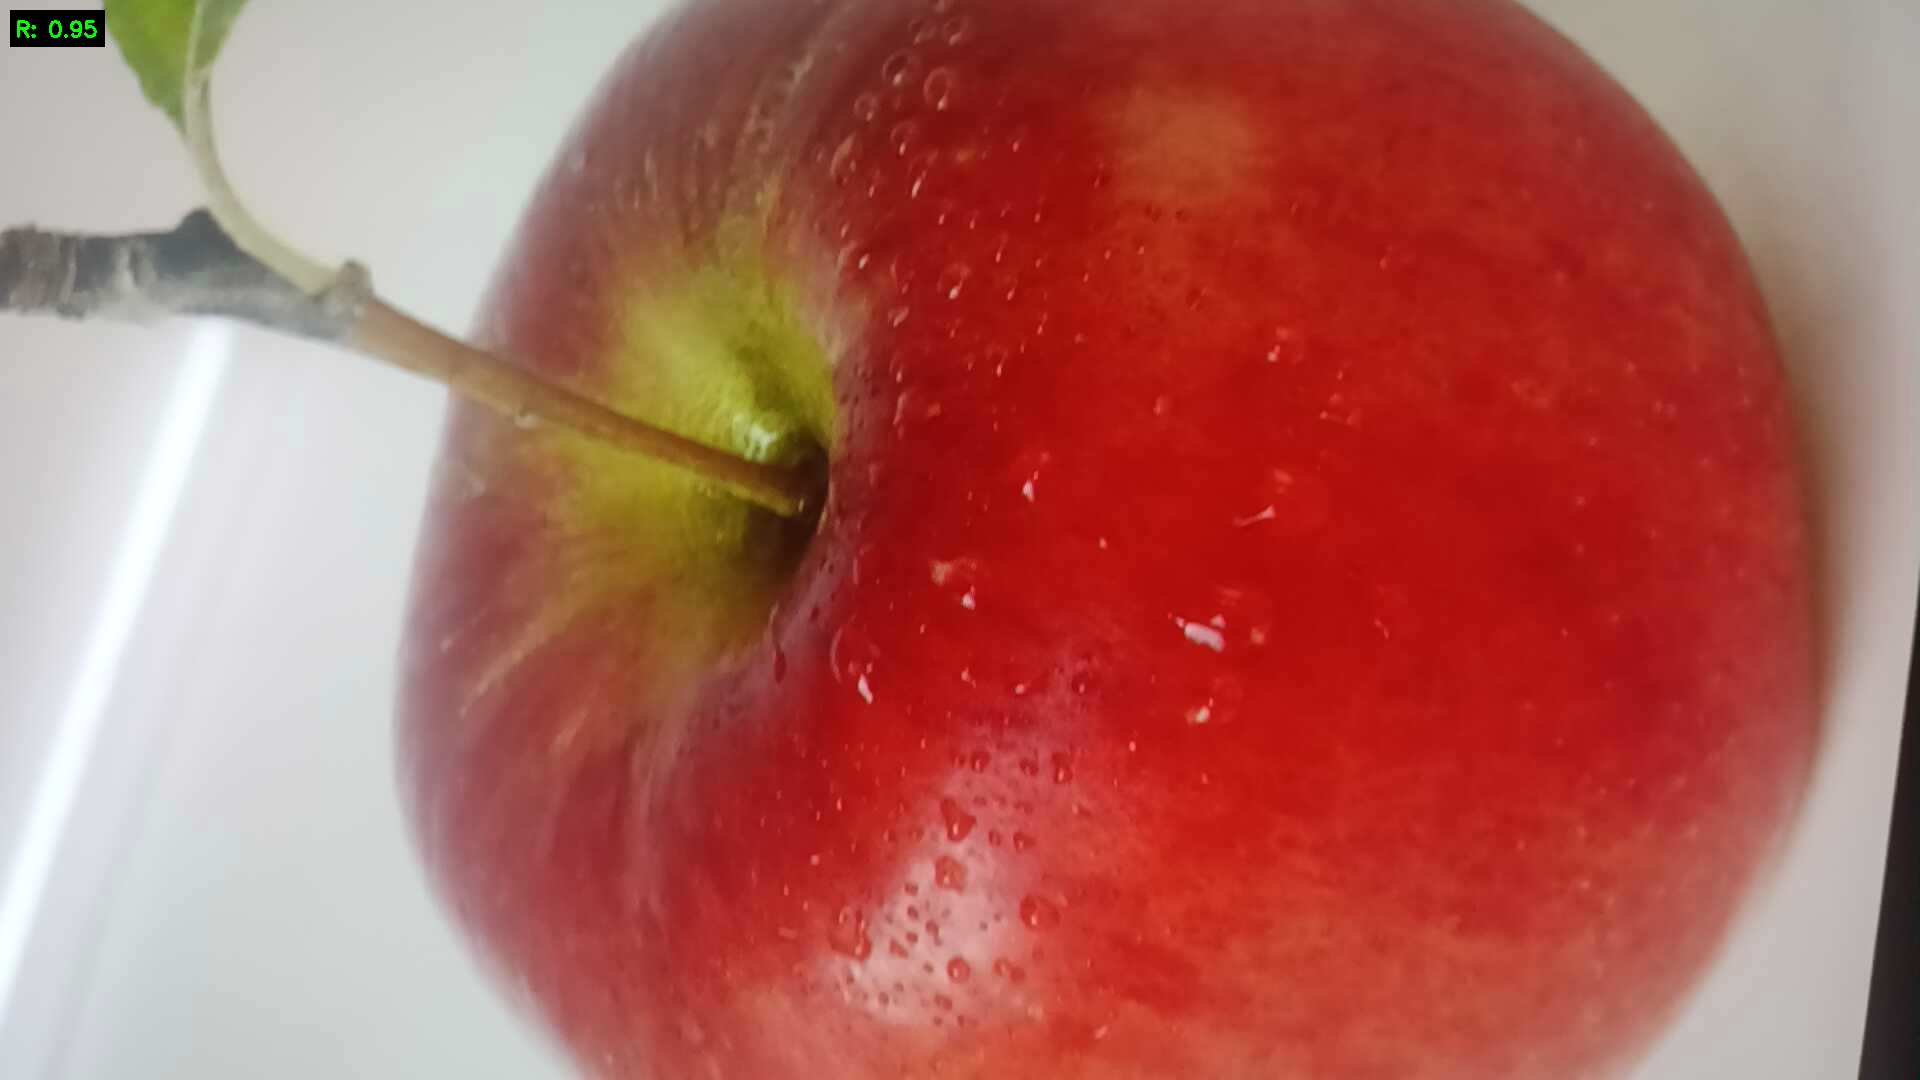

[DenseNet] Prediction: O (Confidence: 0.51)
--------------------------------------------------------


In [11]:
from IPython.display import display
files = get_image_paths('data/TEST/O')

for file in files:
    display(Image.open(file))
    densenet_inference(file)
    print('--------------------------------------------------------')

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

def calculate_metrics(y_true, y_pred):
    return {
        'accuracy': accuracy_score(y_true, y_pred),
        'precision': precision_score(y_true, y_pred, average='weighted', zero_division=0),
        'recall': recall_score(y_true, y_pred, average='weighted', zero_division=0),
        'f1_score': f1_score(y_true, y_pred, average='weighted', zero_division=0)
    }

In [36]:
def evaluate_model(model, test_loader):
    model.eval()
    y_true, y_pred = [], []

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            preds = torch.argmax(outputs, dim=1)

            y_true.extend(labels.cpu().numpy())
            y_pred.extend(preds.cpu().numpy())

    # Metrics
    metrics = calculate_metrics(y_true, y_pred)
    print(f"\nFinal Test Metrics:")
    print(f"Accuracy  : {metrics['accuracy']:.4f}")
    print(f"Precision : {metrics['precision']:.4f}")
    print(f"Recall    : {metrics['recall']:.4f}")
    print(f"F1 Score  : {metrics['f1_score']:.4f}")

    # Detailed report
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, zero_division=0))

In [37]:
test_dataset = datasets.ImageFolder(os.path.join(DATASET_DIR, "TEST"), transform=test_transform)

test_loader = DataLoader(
    test_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False,
    num_workers=2,
    pin_memory=True,
    persistent_workers=True
)

In [38]:
# Evaluate:
evaluate_model(model, test_loader)

d:\Hackathon project\smart-dustbin-be-engine\venv\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)



Final Test Metrics:
Accuracy  : 0.9524
Precision : 0.9529
Recall    : 0.9524
F1 Score  : 0.9524

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      1789
           1       0.97      0.94      0.95      1848

    accuracy                           0.95      3637
   macro avg       0.95      0.95      0.95      3637
weighted avg       0.95      0.95      0.95      3637

